In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from dask import dataframe as df1
import warnings
import os

os.getcwd()
os.chdir(r"C:\Users\yekaa\Downloads")

C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
flood_data2021 = pd.read_csv("datacleantarget_2021_with_Dummies.csv", nrows=100000)
#flood_data2018 = pd.read_csv("/content/drive/Shareddrives/ELP Spring 2023 Term D - Fannie Mae/HDMA Corrected Merged Dataset - Dummies Ready/2018/datacleantarget_2018_with_Dummies_two_million_shuffled.csv", nrows=100000)
#df_default = pd.read_csv("/content/drive/Shareddrives/ELP Spring 2023 Term D - Fannie Mae/HDMA Corrected Merged Dataset - Dummies Ready/Defaut_dataset.csv")
df_default = pd.read_csv("default_new.csv")

# Data Manipulation

## Flood Risk Data

In [3]:
flood2021 = flood_data2021[flood_data2021["Approval"] == 1]

In [4]:
flood2021.head()

,Unnamed: 0,derived_msa-md,lei,state_code,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,...,balloon_payment_1,balloon_payment_2,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74
0,0,29820,549300PFJ7GCGDLB2E65,NV,3.200301e+10,235000.0,95.0,3.75,1.066,5021.3,...,0,1,0,0,1,0,0,0,0,0
1,1,29820,549300PFJ7GCGDLB2E65,NV,3.200301e+10,335000.0,66.4,3.75,0.799,4138.5,...,0,1,0,0,1,0,0,0,0,0
2,2,29820,549300Q50XCC0473FG63,NV,3.200301e+10,125000.0,79.475,4.75,1.92,NaN,...,0,1,0,0,1,0,0,0,0,0
3,4,29820,549300U3721PJGQZYY68,NV,3.200301e+10,305000.0,75.0,2.5,0.214,4754.0,...,0,1,0,0,0,0,0,1,0,0
4,8,29820,549300SVLCM6NZQ53P14,NV,3.200301e+10,285000.0,90.0,3.625,1.318,10488.25,...,0,1,0,0,0,1,0,0,0,0


In [5]:
flood_data = flood2021[['loan_amount','loan_to_value_ratio','interest_rate','debt_to_income_ratio','loan_term','loan_purpose_1', 'loan_purpose_2', 'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31', 'loan_purpose_32']]

In [6]:
print(flood_data.info())
print(flood_data.isna().sum())
print(flood_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81592 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amount           81592 non-null  float64
 1   loan_to_value_ratio   75153 non-null  object 
 2   interest_rate         81387 non-null  object 
 3   debt_to_income_ratio  73749 non-null  object 
 4   loan_term             81148 non-null  object 
 5   loan_purpose_1        81592 non-null  int64  
 6   loan_purpose_2        81592 non-null  int64  
 7   loan_purpose_4        81592 non-null  int64  
 8   loan_purpose_5        81592 non-null  int64  
 9   loan_purpose_31       81592 non-null  int64  
 10  loan_purpose_32       81592 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 7.5+ MB
None
loan_amount                0
loan_to_value_ratio     6439
interest_rate            205
debt_to_income_ratio    7843
loan_term                444
loan_purpose_1  

In [7]:
flood_data = flood_data.replace('Exempt', None)
flood_data = flood_data.dropna()
print(flood_data.shape)

(70781, 11)


In [8]:
flood_data['debt_to_income_ratio'].unique()

array(['45', '20%-<30%', '30%-<36%', '38', '40', '49', '43', '47',
       '50%-60%', '44', '48', '>60%', '42', '41', '<20%', '46', '36',
       '39', '37'], dtype=object)

In [9]:
# Fix dti values
replacement_dict = {'20%-<30%': '25', '30%-<36%': '33', '50%-60%': '55', '>60%': '75', '<20%': '15'}
flood_data['debt_to_income_ratio'] = flood_data['debt_to_income_ratio'].replace(replacement_dict)
flood_data['debt_to_income_ratio']

0        45
1        25
2        33
3        38
4        25
         ..
99987    44
99990    40
99995    55
99996    41
99999    33
Name: debt_to_income_ratio, Length: 70781, dtype: object

In [10]:
flood_data['debt_to_income_ratio'] = flood_data['debt_to_income_ratio'].astype(int)
# Replace values based on conditions
flood_data.loc[flood_data['debt_to_income_ratio'] <= 20, 'debt_to_income_ratio'] = 0
flood_data.loc[(flood_data['debt_to_income_ratio'] >20) & (flood_data['debt_to_income_ratio'] <= 30), 'debt_to_income_ratio'] = 1
flood_data.loc[(flood_data['debt_to_income_ratio'] >30) & (flood_data['debt_to_income_ratio'] <= 40), 'debt_to_income_ratio'] = 2
flood_data.loc[(flood_data['debt_to_income_ratio'] >40) & (flood_data['debt_to_income_ratio'] <= 50), 'debt_to_income_ratio'] = 3
flood_data.loc[(flood_data['debt_to_income_ratio'] >50) & (flood_data['debt_to_income_ratio'] <= 60), 'debt_to_income_ratio'] = 4
flood_data.loc[flood_data['debt_to_income_ratio'] >60,  'debt_to_income_ratio'] = 5

flood_data.head()

,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_2,loan_purpose_4,loan_purpose_5,loan_purpose_31,loan_purpose_32
0,235000.0,95.0,3.75,3,360.0,1,0,0,0,0,0
1,335000.0,66.4,3.75,1,360.0,1,0,0,0,0,0
2,125000.0,79.475,4.75,2,360,1,0,0,0,0,0
3,305000.0,75.0,2.5,2,180,1,0,0,0,0,0
4,285000.0,90.0,3.625,1,360,1,0,0,0,0,0


In [11]:
# Create new column by adding columns A and B
flood_data = flood_data.assign(loan_purpose_other=flood_data['loan_purpose_2'] + flood_data['loan_purpose_4']+ flood_data['loan_purpose_5'])

# Drop columns A and B
flood_data = flood_data.drop(['loan_purpose_2','loan_purpose_4','loan_purpose_5'], axis=1)

In [12]:
flood_data = flood_data.astype({'loan_to_value_ratio':'float','interest_rate':'float','loan_term': 'float'})
flood_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70781 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amount           70781 non-null  float64
 1   loan_to_value_ratio   70781 non-null  float64
 2   interest_rate         70781 non-null  float64
 3   debt_to_income_ratio  70781 non-null  int32  
 4   loan_term             70781 non-null  float64
 5   loan_purpose_1        70781 non-null  int64  
 6   loan_purpose_31       70781 non-null  int64  
 7   loan_purpose_32       70781 non-null  int64  
 8   loan_purpose_other    70781 non-null  int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 5.1 MB


In [13]:
flood_data.shape

(70781, 9)

In [14]:
flood_data.head()

,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_31,loan_purpose_32,loan_purpose_other
0,235000.0,95.000,3.750,3,360.0,1,0,0,0
1,335000.0,66.400,3.750,1,360.0,1,0,0,0
2,125000.0,79.475,4.750,2,360.0,1,0,0,0
3,305000.0,75.000,2.500,2,180.0,1,0,0,0
4,285000.0,90.000,3.625,1,360.0,1,0,0,0


## Default Data

In [15]:
df_default.head()

,Unnamed: 0,loan_id,orig_chn,seller,interest_rate,loan_amount,loan_term,oltv,loan_to_value_ratio,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32,debt_to_income_ratio,occupancy_type
0,0,1.000000e+11,R,OTHER,8.250,50000,360,50,50,2,...,1,0.378788,0,1,1,0,0,0,4,1
1,1,1.000000e+11,R,"GMAC MORTGAGE, LLC",8.000,170000,360,80,80,2,...,1,0.854271,2,2,1,0,0,0,5,1
2,3,1.010000e+11,B,"JP MORGAN CHASE BANK, NA",8.500,141000,360,74,74,2,...,1,0.792135,1,1,1,0,0,0,4,1
3,4,1.010000e+11,R,"JP MORGAN CHASE BANK, NA",8.050,63000,180,61,61,2,...,0,0.353933,1,1,0,0,0,1,2,1
4,5,1.010000e+11,C,"JPMORGAN CHASE BANK, NA",7.875,56000,360,78,78,1,...,1,0.386207,1,1,1,0,0,0,3,1


In [16]:
default = df_default[['delin_90','loan_amount','loan_to_value_ratio','interest_rate','debt_to_income_ratio','loan_term','loan_purpose_1', 'loan_purpose_other','loan_purpose_31', 'loan_purpose_32']]
default.head()

,delin_90,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
0,0,50000,50,8.250,4,360,1,0,0,0
1,0,170000,80,8.000,5,360,1,0,0,0
2,0,141000,74,8.500,4,360,1,0,0,0
3,1,63000,61,8.050,2,180,0,0,0,1
4,0,56000,78,7.875,3,360,1,0,0,0


In [17]:
default['delin_90'].value_counts()

0    63702
1     4002
Name: delin_90, dtype: int64

In [18]:
print(default.info())
print(default.isna().sum())
print(default.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67704 entries, 0 to 67703
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   delin_90              67704 non-null  int64  
 1   loan_amount           67704 non-null  int64  
 2   loan_to_value_ratio   67704 non-null  int64  
 3   interest_rate         67704 non-null  float64
 4   debt_to_income_ratio  67704 non-null  int64  
 5   loan_term             67704 non-null  int64  
 6   loan_purpose_1        67704 non-null  int64  
 7   loan_purpose_other    67704 non-null  int64  
 8   loan_purpose_31       67704 non-null  int64  
 9   loan_purpose_32       67704 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.2 MB
None
delin_90                0
loan_amount             0
loan_to_value_ratio     0
interest_rate           0
debt_to_income_ratio    0
loan_term               0
loan_purpose_1          0
loan_purpose_other      0
loan_purpose_31 

In [19]:
default.head(2)

,delin_90,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
0,0,50000,50,8.25,4,360,1,0,0,0
1,0,170000,80,8.00,5,360,1,0,0,0


In [20]:
flood_data.head(2)

,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_31,loan_purpose_32,loan_purpose_other
0,235000.0,95.0,3.75,3,360.0,1,0,0,0
1,335000.0,66.4,3.75,1,360.0,1,0,0,0


# Default Dataset Prediction All Machine Learning Models


In [21]:
default.head()

,delin_90,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
0,0,50000,50,8.250,4,360,1,0,0,0
1,0,170000,80,8.000,5,360,1,0,0,0
2,0,141000,74,8.500,4,360,1,0,0,0
3,1,63000,61,8.050,2,180,0,0,0,1
4,0,56000,78,7.875,3,360,1,0,0,0


In [22]:
default['delin_90'].value_counts()

0    63702
1     4002
Name: delin_90, dtype: int64

In [23]:
X = default.drop(['delin_90'], axis=1)
y = default['delin_90']

In [24]:
!pip install -U imbalanced-learn

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis = 1)

default = df_resampled
X = default.drop(['delin_90'], axis=1)
y = default['delin_90']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89182, 9)
(38222, 9)
(89182,)
(38222,)


In [28]:
# If upsampling do not run just run upsample cell
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

### Upsample Minority Class Using resample

In [29]:
## Imbalance Sampling
# concatenate our training data back together
#X = pd.concat([X_train, y_train], axis=1)
#X.head()

In [30]:
#from sklearn.utils import resample
# separate minority and majority classes
#not_def = X[X.delin_90==0]
#defa = X[X.delin_90==1]

# upsample minority
#fraud_upsampled = resample(defa,
                         # replace=True, # sample with replacement
                          #n_samples=len(not_def), # match number in majority class
                          #random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([not_def, fraud_upsampled])

# check new class counts
#upsampled.delin_90.value_counts()

IndentationError: unexpected indent (<ipython-input-30-55a22f839c11>, line 8)

In [ ]:
# trying logistic regression again with the balanced dataset
#y_train = upsampled.delin_90
#X_train = upsampled.drop('delin_90', axis=1)

In [31]:
#np.unique(y_test, return_counts=True)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

## Logistic Regression


### Logistic Regression without GridsearchCV

In [34]:
#train logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)
print('Train Accuracy Score', train_score_lr)
print('Test Accuracy Score', test_score_lr)

Train Accuracy Score 0.7981991881769864
Test Accuracy Score 0.8016587305740149


In [36]:
prob_lr = lr.predict_proba(X_test)
df_prob_lr = pd.DataFrame(prob_lr)
df_prob_lr.head()

,0,1
0,0.691799,0.308201
1,0.411958,0.588042
2,0.755565,0.244435
3,0.000655,0.999345
4,0.475402,0.524598


In [37]:
pred_lr = lr.predict(X_test)
df_pred_lr = pd.DataFrame(pred_lr)
df_pred_lr.head()

,0
0,0
1,1
2,0
3,1
4,1


In [38]:
df_pred_lr[0].value_counts()

0    21428
1    16794
Name: 0, dtype: int64

In [39]:
# Concatenate dataframes side by side
pred_final_lr = pd.concat([df_pred_lr, df_prob_lr], axis=1)
pred_final_lr.head()

,0,0,1
0,0,0.691799,0.308201
1,1,0.411958,0.588042
2,0,0.755565,0.244435
3,1,0.000655,0.999345
4,1,0.475402,0.524598


In [40]:
predicted_df_lr = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_lr})
predicted_df_lr.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,0
118183,1,1
117927,1,1


In [41]:
probability_actual_lr = (predicted_df_lr['Actual value'][predicted_df_lr['Actual value']==1].count()/predicted_df_lr['Actual value'].count())
probability_pred_lr = (predicted_df_lr['Predicted value'][predicted_df_lr['Predicted value']==1].count()/predicted_df_lr['Actual value'].count())
pr_lr = {'Actual Probability':  [probability_actual_lr],
        'Predicted Probability': [probability_pred_lr]}
pr_lr = pd.DataFrame(pr_lr)  
pr_lr  

,Actual Probability,Predicted Probability
0,0.499791,0.43938


<AxesSubplot:>

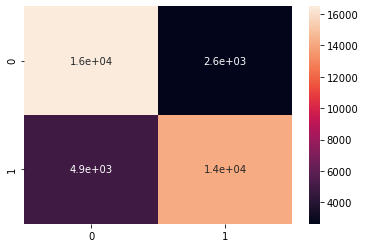

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cf_matrix_lr,annot=True)

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_lr).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_lr = round(fn / (tp + fn),2)
print("False negative rate:", fnr_lr)
fpr_lr = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_lr)

False negative rate: 0.26
False positive rate: 0.14


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     19119
           1       0.84      0.74      0.79     19103

    accuracy                           0.80     38222
   macro avg       0.81      0.80      0.80     38222
weighted avg       0.81      0.80      0.80     38222



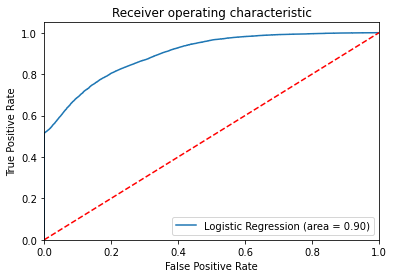

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc = roc_auc_score(y_test, prob_lr[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_lr[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
acc_lr = accuracy_score(y_test, pred_lr)
prec_lr = precision_score(y_test, pred_lr)
rec_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

lr_results = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr, lr_roc_auc,
                             probability_actual_lr, probability_pred_lr,
                                fnr_lr, fpr_lr]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])
lr_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Logistic Regression,0.801659,0.843039,0.74114,0.788812,0.898727,0.499791,0.43938,0.26,0.14


### Logistic Regression with GridSearchCV

In [47]:
#train logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters = {'C': np.logspace(-2, 0, 20),
              'penalty': ['none', 'l2', 'l1'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
lr = LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=5, verbose=0)
logreg_cv = grid_search.fit(X_train, y_train)

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warni

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
#test logistic regression
print('Tuned hpyerparameters (best parameters):', logreg_cv.best_params_)
print('Train accuracy:', logreg_cv.best_score_)
print('Test accuracy:', logreg_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Train accuracy: 0.7982664740961243
Test accuracy: 0.8018941970592852


In [49]:
prob_logreg_cv = logreg_cv.predict_proba(X_test)
df_prob_logreg_cv = pd.DataFrame(prob_logreg_cv)
df_prob_logreg_cv.head()

,0,1
0,0.681445,0.318555
1,0.413636,0.586364
2,0.754285,0.245715
3,0.016681,0.983319
4,0.473666,0.526334


In [50]:
pred_logreg_cv = logreg_cv.predict(X_test)
df_pred_logreg_cv = pd.DataFrame(pred_logreg_cv)
df_pred_logreg_cv.head()

,0
0,0
1,1
2,0
3,1
4,1


In [51]:
df_pred_logreg_cv[0].value_counts()

0    21421
1    16801
Name: 0, dtype: int64

In [52]:
# Concatenate dataframes side by side
pred_final_logreg_cv = pd.concat([df_pred_logreg_cv, df_prob_logreg_cv], axis=1)
pred_final_logreg_cv.head()

,0,0,1
0,0,0.681445,0.318555
1,1,0.413636,0.586364
2,0,0.754285,0.245715
3,1,0.016681,0.983319
4,1,0.473666,0.526334


In [53]:
predicted_df_logreg = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_logreg_cv})
predicted_df_logreg.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,0
118183,1,1
117927,1,1


In [54]:
probability_actual_logreg = (predicted_df_logreg['Actual value'][predicted_df_logreg['Actual value']==1].count()/predicted_df_logreg['Actual value'].count())
probability_pred_logreg = (predicted_df_logreg['Predicted value'][predicted_df_logreg['Predicted value']==1].count()/predicted_df_logreg['Actual value'].count())
pr_logreg = {'Actual Probability':  [probability_actual_logreg],
        'Predicted Probability': [probability_pred_logreg]}
pr_df_logreg = pd.DataFrame(pr_logreg)  
pr_df_logreg

,Actual Probability,Predicted Probability
0,0.499791,0.439564


<AxesSubplot:>

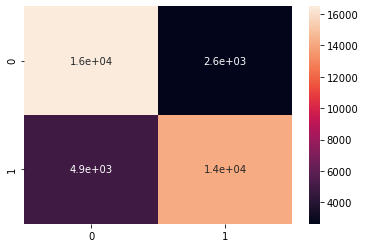

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_logreg_cv = confusion_matrix(y_test, pred_logreg_cv)
sns.heatmap(cf_matrix_logreg_cv,annot=True)

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_logreg_cv).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_logreg_cv = round(fn / (tp + fn),2)
print("False negative rate:", fnr_logreg_cv)
fpr_logreg_cv = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_logreg_cv)

False negative rate: 0.26
False positive rate: 0.14


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg_cv))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     19119
           1       0.84      0.74      0.79     19103

    accuracy                           0.80     38222
   macro avg       0.81      0.80      0.80     38222
weighted avg       0.81      0.80      0.80     38222



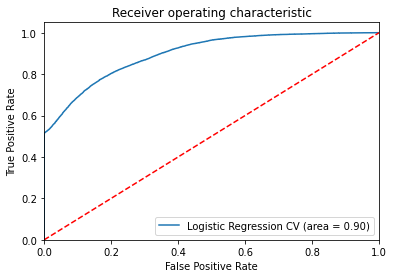

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg_cv_roc_auc = roc_auc_score(y_test, prob_logreg_cv[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_logreg_cv[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression CV (area = %0.2f)' % logreg_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
acc_logreg = accuracy_score(y_test, pred_logreg_cv)
prec_logreg = precision_score(y_test, pred_logreg_cv)
rec_logreg = recall_score(y_test, pred_logreg_cv)
f1_logreg = f1_score(y_test, pred_logreg_cv)

logreg_cv_results = pd.DataFrame([['Logistic Regression CV', acc_logreg, prec_logreg, rec_logreg, f1_logreg, logreg_cv_roc_auc,
                             probability_actual_logreg, probability_pred_logreg,
                                fnr_logreg_cv, fpr_logreg_cv]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

logreg_cv_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Logistic Regression CV,0.801894,0.843164,0.741559,0.789104,0.898723,0.499791,0.439564,0.26,0.14


## Random Forest


### Random Forest without GridSearchCV

In [60]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print('Train Accuracy Score', train_score_rf)
print('Test Accuracy Score', test_score_rf)

Train Accuracy Score 0.9990805319459084
Test Accuracy Score 0.9351682277222542


In [62]:
prob_rf = rf.predict_proba(X_test)
df_prob_rf = pd.DataFrame(prob_rf)
df_prob_rf.head()

,0,1
0,0.85,0.15
1,0.15,0.85
2,0.17,0.83
3,0.00,1.00
4,0.01,0.99


In [63]:
pred_rf = rf.predict(X_test)
df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.head()

,0
0,0
1,1
2,1
3,1
4,1


In [64]:
df_pred_rf[0].value_counts()

0    19619
1    18603
Name: 0, dtype: int64

In [65]:
# Concatenate dataframes side by side
pred_final_rf = pd.concat([df_pred_rf, df_prob_rf], axis=1)
pred_final_rf.head()

,0,0,1
0,0,0.85,0.15
1,1,0.15,0.85
2,1,0.17,0.83
3,1,0.00,1.00
4,1,0.01,0.99


In [66]:
predicted_df_rf = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_rf})
predicted_df_rf.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [67]:
probability_actual_rf = (predicted_df_rf['Actual value'][predicted_df_rf['Actual value']==1].count()/predicted_df_rf['Actual value'].count())
probability_pred_rf = (predicted_df_rf['Predicted value'][predicted_df_rf['Predicted value']==1].count()/predicted_df_rf['Actual value'].count())
pr_rf = {'Actual Probability':  [probability_actual_rf],
        'Predicted Probability': [probability_pred_rf]}
pr_df_rf = pd.DataFrame(pr_rf)  
pr_df_rf 

,Actual Probability,Predicted Probability
0,0.499791,0.486709


<AxesSubplot:>

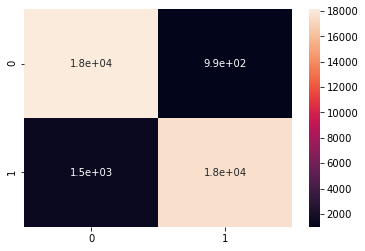

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cf_matrix_rf,annot=True)

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_rf).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_rf = round(fn / (tp + fn),2)
print("False negative rate:", fnr_rf)
fpr_rf = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_rf)

False negative rate: 0.08
False positive rate: 0.05


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     19119
           1       0.95      0.92      0.93     19103

    accuracy                           0.94     38222
   macro avg       0.94      0.94      0.94     38222
weighted avg       0.94      0.94      0.94     38222



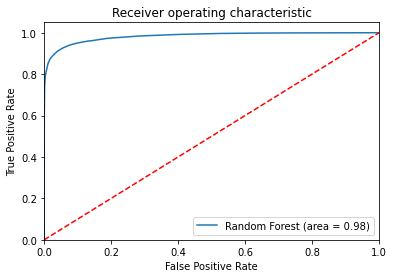

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, prob_rf[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_rf[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
acc_rf = accuracy_score(y_test, pred_rf)
prec_rf = precision_score(y_test, pred_rf)
rec_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)

rf_results = pd.DataFrame([['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf, rf_roc_auc,
                             probability_actual_rf, probability_pred_rf,
                                fnr_rf, fpr_rf]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

rf_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Random Forest,0.935168,0.946837,0.922054,0.934281,0.982439,0.499791,0.486709,0.08,0.05


### Random Forest with GridSearchCV

In [73]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [100, 200],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt', 'log2']}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, parameters, cv=5, verbose=0)
forest_cv = grid_search.fit(X_train, y_train)


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

In [74]:
#test random forest
print("Tuned hpyerparameters (best parameters):", forest_cv.best_params_)
print("Train accuracy:", forest_cv.best_score_)
print("Test accuracy:", forest_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'max_depth': 18, 'max_features': 'log2', 'n_estimators': 200}
Train accuracy: 0.9119553273675123
Test accuracy: 0.9191826696666842


In [75]:
prob_forest_cv = forest_cv.predict_proba(X_test)
df_prob_forest_cv = pd.DataFrame(prob_forest_cv)
df_prob_forest_cv.head()

,0,1
0,0.836422,0.163578
1,0.233444,0.766556
2,0.396480,0.603520
3,0.010000,0.990000
4,0.084673,0.915327


In [76]:
pred_forest_cv = forest_cv.predict(X_test)
df_pred_forest_cv = pd.DataFrame(pred_forest_cv)
df_pred_forest_cv.head()

,0
0,0
1,1
2,1
3,1
4,1


In [77]:
df_pred_forest_cv[0].value_counts()

0    19334
1    18888
Name: 0, dtype: int64

In [78]:
# Concatenate dataframes side by side
pred_final_forest_cv = pd.concat([df_pred_forest_cv, df_prob_forest_cv], axis=1)
pred_final_forest_cv.head()

,0,0,1
0,0,0.836422,0.163578
1,1,0.233444,0.766556
2,1,0.396480,0.603520
3,1,0.010000,0.990000
4,1,0.084673,0.915327


In [79]:
predicted_df_forest_cv = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_forest_cv})
predicted_df_forest_cv.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [80]:
probability_actual_forest_cv = (predicted_df_forest_cv['Actual value'][predicted_df_forest_cv['Actual value']==1].count()/predicted_df_forest_cv['Actual value'].count())
probability_pred_forest_cv = (predicted_df_forest_cv['Predicted value'][predicted_df_forest_cv['Predicted value']==1].count()/predicted_df_forest_cv['Actual value'].count())
pr_forest_cv = {'Actual Probability':  [probability_actual_forest_cv],
        'Predicted Probability': [probability_pred_forest_cv]}
pr_df_forest_cv = pd.DataFrame(pr_forest_cv)  
pr_df_forest_cv

,Actual Probability,Predicted Probability
0,0.499791,0.494166


<AxesSubplot:>

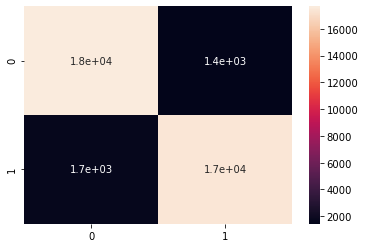

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_forest_cv = confusion_matrix(y_test, pred_forest_cv)
sns.heatmap(cf_matrix_forest_cv,annot=True)

In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_forest_cv).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_forest_cv = round(fn / (tp + fn),2)
print("False negative rate:", fnr_forest_cv)
fpr_forest_cv = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_forest_cv)

False negative rate: 0.09
False positive rate: 0.08


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_forest_cv))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     19119
           1       0.92      0.91      0.92     19103

    accuracy                           0.92     38222
   macro avg       0.92      0.92      0.92     38222
weighted avg       0.92      0.92      0.92     38222



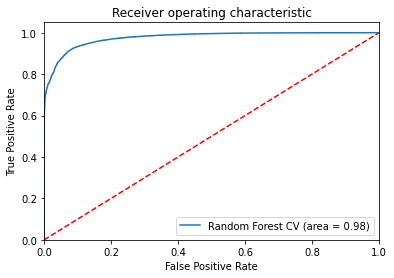

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
forest_cv_roc_auc = roc_auc_score(y_test, prob_forest_cv[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_forest_cv[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest CV (area = %0.2f)' % forest_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [85]:
acc_forest_cv = accuracy_score(y_test, pred_forest_cv)
prec_forest_cv = precision_score(y_test, pred_forest_cv)
rec_forest_cv = recall_score(y_test, pred_forest_cv)
f1_forest_cv = f1_score(y_test, pred_forest_cv)

forest_cv_results = pd.DataFrame([['Random Forest CV', acc_forest_cv, prec_forest_cv, rec_forest_cv, f1_forest_cv, forest_cv_roc_auc,
                             probability_actual_forest_cv, probability_pred_forest_cv,
                                fnr_forest_cv, fpr_forest_cv]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

forest_cv_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Random Forest CV,0.919183,0.92392,0.913521,0.918691,0.975842,0.499791,0.494166,0.09,0.08


## KNN

### KNN without GridSearchCV

In [86]:
#train k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [87]:
train_score_knn = knn.score(X_train, y_train)
test_score_knn = knn.score(X_test, y_test)
print('Train Accuracy Score', train_score_knn)
print('Test Accuracy Score', test_score_knn)

Train Accuracy Score 0.9040501446480231
Test Accuracy Score 0.855475903929674


In [88]:
prob_knn = knn.predict_proba(X_test)
df_prob_knn = pd.DataFrame(prob_knn)
df_prob_knn.head()

,0,1
0,0.6,0.4
1,0.4,0.6
2,0.4,0.6
3,0.0,1.0
4,0.0,1.0


In [89]:
pred_knn = knn.predict(X_test)
df_pred_knn = pd.DataFrame(pred_knn)
df_pred_knn.head()

,0
0,0
1,1
2,1
3,1
4,1


In [90]:
df_pred_knn[0].value_counts()

1    19795
0    18427
Name: 0, dtype: int64

In [91]:
# Concatenate dataframes side by side
pred_final_knn = pd.concat([df_pred_knn, df_prob_knn], axis=1)
pred_final_knn.head()

,0,0,1
0,0,0.6,0.4
1,1,0.4,0.6
2,1,0.4,0.6
3,1,0.0,1.0
4,1,0.0,1.0


In [92]:
predicted_df_knn = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_knn})
predicted_df_knn.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [93]:
probability_actual_knn = (predicted_df_knn['Actual value'][predicted_df_knn['Actual value']==1].count()/predicted_df_knn['Actual value'].count())
probability_pred_knn = (predicted_df_knn['Predicted value'][predicted_df_knn['Predicted value']==1].count()/predicted_df_knn['Actual value'].count())
pr_knn = {'Actual Probability':  [probability_actual_knn],
        'Predicted Probability': [probability_pred_knn]}
pr_df_knn = pd.DataFrame(pr_knn)  
pr_df_knn

,Actual Probability,Predicted Probability
0,0.499791,0.517895


<AxesSubplot:>

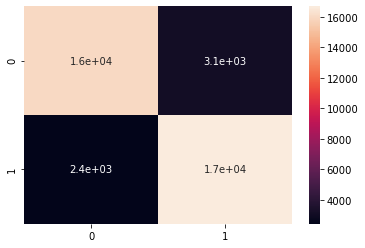

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_knn = confusion_matrix(y_test, pred_knn)
sns.heatmap(cf_matrix_knn,annot=True)

In [95]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_knn).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_knn = round(fn / (tp + fn),2)
print("False negative rate:", fnr_knn)
fpr_knn = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_knn)

False negative rate: 0.13
False positive rate: 0.16


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     19119
           1       0.84      0.87      0.86     19103

    accuracy                           0.86     38222
   macro avg       0.86      0.86      0.86     38222
weighted avg       0.86      0.86      0.86     38222



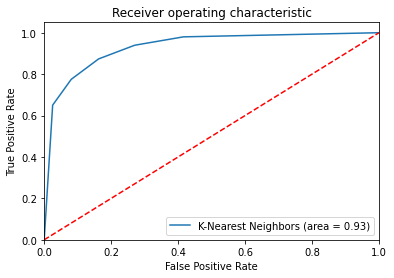

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, prob_knn[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_knn[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K-Nearest Neighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [98]:
acc_knn = accuracy_score(y_test, pred_knn)
prec_knn = precision_score(y_test, pred_knn)
rec_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)

knn_results = pd.DataFrame([['K-Nearest Neighbors', acc_knn, prec_knn, rec_knn, f1_knn, knn_roc_auc,
                             probability_actual_knn, probability_pred_knn,
                                fnr_knn, fpr_knn]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

knn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,K-Nearest Neighbors,0.855476,0.842991,0.873528,0.857988,0.930873,0.499791,0.517895,0.13,0.16


### KNN with GridSearchCV

In [99]:
#train k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': list(range(1, 20))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5, verbose=0)
knn_cv = grid_search.fit(X_train, y_train)

In [100]:
#test k-nearest neighbors
print("Tuned hpyerparameters (best parameters):", knn_cv.best_params_)
print("Train accuracy:", knn_cv.best_score_)
print("Test accuracy:", knn_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'n_neighbors': 1}
Train accuracy: 0.8625507399662361
Test accuracy: 0.8684527235623463


In [101]:
prob_knn_cv = knn_cv.predict_proba(X_test)
df_prob_knn_cv = pd.DataFrame(prob_knn_cv)
df_prob_knn_cv.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [102]:
pred_knn_cv = knn_cv.predict(X_test)
df_pred_knn_cv = pd.DataFrame(pred_knn_cv)
df_pred_knn_cv.head()

,0
0,0
1,1
2,1
3,1
4,1


In [103]:
df_pred_knn_cv[0].value_counts()

1    19873
0    18349
Name: 0, dtype: int64

In [104]:
# Concatenate dataframes side by side
pred_final_knn_cv = pd.concat([df_pred_knn_cv, df_prob_knn_cv], axis=1)
pred_final_knn_cv.head()

,0,0,1
0,0,1.0,0.0
1,1,0.0,1.0
2,1,0.0,1.0
3,1,0.0,1.0
4,1,0.0,1.0


In [105]:
predicted_df_knn_cv = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_knn_cv})
predicted_df_knn_cv.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [106]:
probability_actual_knn_cv = (predicted_df_knn_cv['Actual value'][predicted_df_knn_cv['Actual value']==1].count()/predicted_df_knn_cv['Actual value'].count())
probability_pred_knn_cv = (predicted_df_knn_cv['Predicted value'][predicted_df_knn_cv['Predicted value']==1].count()/predicted_df_knn_cv['Actual value'].count())
pr_knn_cv = {'Actual Probability':  [probability_actual_knn_cv],
        'Predicted Probability': [probability_pred_knn_cv]}
pr_df_knn_cv = pd.DataFrame(pr_knn_cv)  
pr_df_knn_cv

,Actual Probability,Predicted Probability
0,0.499791,0.519936


<AxesSubplot:>

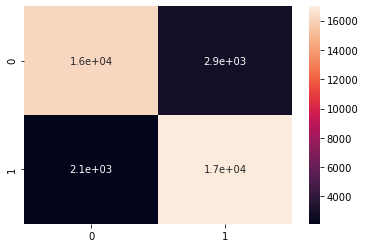

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_knn_cv = confusion_matrix(y_test, pred_knn_cv)
sns.heatmap(cf_matrix_knn_cv,annot=True)

In [108]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_knn_cv).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_knn_cv = round(fn / (tp + fn),2)
print("False negative rate:", fnr_knn_cv)
fpr_knn_cv = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_knn_cv)

False negative rate: 0.11
False positive rate: 0.15


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn_cv))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     19119
           1       0.85      0.89      0.87     19103

    accuracy                           0.87     38222
   macro avg       0.87      0.87      0.87     38222
weighted avg       0.87      0.87      0.87     38222



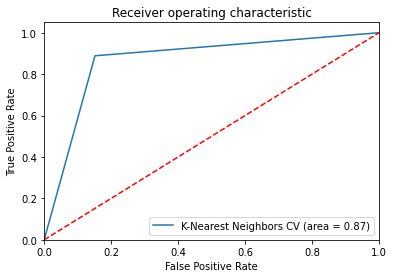

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_cv_roc_auc = roc_auc_score(y_test, prob_knn_cv[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_knn_cv[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K-Nearest Neighbors CV (area = %0.2f)' % knn_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [111]:
acc_knn_cv = accuracy_score(y_test, pred_knn_cv)
prec_knn_cv = precision_score(y_test, pred_knn_cv)
rec_knn_cv = recall_score(y_test, pred_knn_cv)
f1_knn_cv = f1_score(y_test, pred_knn_cv)

knn_cv_results = pd.DataFrame([['K-Nearest Neighbors CV', acc_knn_cv, prec_knn_cv, rec_knn_cv, f1_knn_cv, knn_cv_roc_auc,
                             probability_actual_knn_cv, probability_pred_knn_cv,
                                fnr_knn_cv, fpr_knn_cv]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

knn_cv_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,K-Nearest Neighbors CV,0.868453,0.854124,0.888552,0.870998,0.868461,0.499791,0.519936,0.11,0.15


## Decision Tree

### Decision Tree without GridSearchCV

In [112]:
#train decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
train_score_tree = tree.score(X_train, y_train)
test_score_tree = tree.score(X_test, y_test)
print('Train Accuracy Score', train_score_tree)
print('Test Accuracy Score', test_score_tree)

Train Accuracy Score 0.9990917449709583
Test Accuracy Score 0.91947046203757


In [114]:
prob_tree = tree.predict_proba(X_test)
df_prob_tree = pd.DataFrame(prob_tree)
df_prob_tree.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [115]:
pred_tree = tree.predict(X_test)
df_pred_tree = pd.DataFrame(pred_tree)
df_pred_tree.head()

,0
0,0
1,1
2,1
3,1
4,1


In [116]:
df_pred_tree[0].value_counts()

1    19355
0    18867
Name: 0, dtype: int64

In [117]:
# Concatenate dataframes side by side
pred_final_tree = pd.concat([df_pred_tree, df_prob_tree], axis=1)
pred_final_tree.head()

,0,0,1
0,0,1.0,0.0
1,1,0.0,1.0
2,1,0.0,1.0
3,1,0.0,1.0
4,1,0.0,1.0


In [118]:
predicted_df_tree = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_tree})
predicted_df_tree.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [119]:
probability_actual_tree = (predicted_df_tree['Actual value'][predicted_df_tree['Actual value']==1].count()/predicted_df_tree['Actual value'].count())
probability_pred_tree = (predicted_df_tree['Predicted value'][predicted_df_tree['Predicted value']==1].count()/predicted_df_tree['Actual value'].count())
pr_tree = {'Actual Probability':  [probability_actual_tree],
        'Predicted Probability': [probability_pred_tree]}
pr_df_tree = pd.DataFrame(pr_tree)  
pr_df_tree

,Actual Probability,Predicted Probability
0,0.499791,0.506384


<AxesSubplot:>

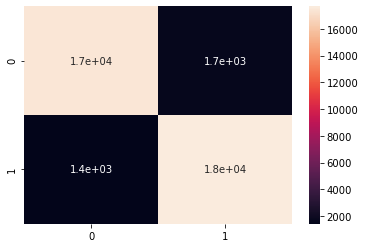

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_tree = confusion_matrix(y_test, pred_tree)
sns.heatmap(cf_matrix_tree,annot=True)

In [121]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_tree).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_tree = round(fn / (tp + fn),2)
print("False negative rate:", fnr_tree)
fpr_tree = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_tree)

False negative rate: 0.07
False positive rate: 0.09


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     19119
           1       0.91      0.93      0.92     19103

    accuracy                           0.92     38222
   macro avg       0.92      0.92      0.92     38222
weighted avg       0.92      0.92      0.92     38222



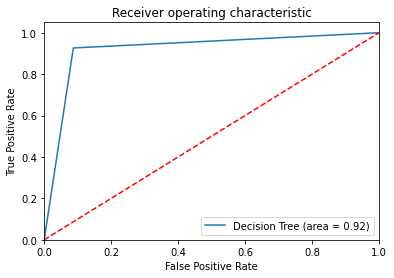

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc = roc_auc_score(y_test, prob_tree[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_tree[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [124]:
acc_tree = accuracy_score(y_test, pred_tree)
prec_tree = precision_score(y_test, pred_tree)
rec_tree = recall_score(y_test, pred_tree)
f1_tree = f1_score(y_test, pred_tree)

tree_results = pd.DataFrame([['Decision Tree', acc_tree, prec_tree, rec_tree, f1_tree, tree_roc_auc,
                             probability_actual_tree, probability_pred_tree,
                                fnr_tree, fpr_tree]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

tree_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Decision Tree,0.91947,0.913976,0.926033,0.919965,0.919662,0.499791,0.506384,0.07,0.09


### Decision Tree with GridSearchCV

In [125]:
#train decision tree
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree_cv = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_cv, parameters, cv=5, verbose=0)
tree_cv = grid_search.fit(X_train, y_train)


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [126]:
#test decision tree
print("Tuned hpyerparameters (best parameters):", tree_cv.best_params_)
print("Train accuracy:", tree_cv.best_score_)
print("Test accuracy:", tree_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Train accuracy: 0.8721490670361568
Test accuracy: 0.8677986499921512


In [127]:
train_score_tree_cv = tree_cv.score(X_train, y_train)
test_score_tree_cv = tree_cv.score(X_test, y_test)
print('Train Accuracy Score', train_score_tree_cv)
print('Test Accuracy Score', test_score_tree_cv)

Train Accuracy Score 0.899452804377565
Test Accuracy Score 0.8677986499921512


In [128]:
prob_tree_cv = tree_cv.predict_proba(X_test)
df_prob_tree_cv = pd.DataFrame(prob_tree_cv)
df_prob_tree_cv.head()

,0,1
0,0.888889,0.111111
1,0.401429,0.598571
2,0.390244,0.609756
3,0.000000,1.000000
4,0.200000,0.800000


In [129]:
pred_tree_cv = tree_cv.predict(X_test)
df_pred_tree_cv = pd.DataFrame(pred_tree_cv)
df_pred_tree_cv.head()

,0
0,0
1,1
2,1
3,1
4,1


In [130]:
df_pred_tree_cv[0].value_counts()

1    19324
0    18898
Name: 0, dtype: int64

In [131]:
# Concatenate dataframes side by side
pred_final_tree_cv = pd.concat([df_pred_tree_cv, df_prob_tree_cv], axis=1)
pred_final_tree_cv.head()

,0,0,1
0,0,0.888889,0.111111
1,1,0.401429,0.598571
2,1,0.390244,0.609756
3,1,0.000000,1.000000
4,1,0.200000,0.800000


In [132]:
predicted_df_tree_cv = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_tree_cv})
predicted_df_tree_cv.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [133]:
probability_actual_tree_cv = (predicted_df_tree_cv['Actual value'][predicted_df_tree_cv['Actual value']==1].count()/predicted_df_tree_cv['Actual value'].count())
probability_pred_tree_cv = (predicted_df_tree_cv['Predicted value'][predicted_df_tree_cv['Predicted value']==1].count()/predicted_df_tree_cv['Actual value'].count())
pr_tree_cv = {'Actual Probability':  [probability_actual_tree_cv],
        'Predicted Probability': [probability_pred_tree_cv]}
pr_df_tree_cv = pd.DataFrame(pr_tree_cv)  
pr_df_tree_cv

,Actual Probability,Predicted Probability
0,0.499791,0.505573


<AxesSubplot:>

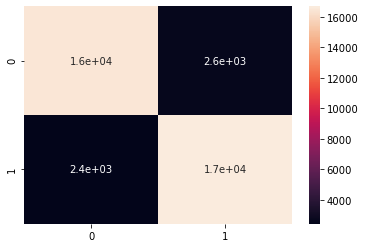

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_tree_cv = confusion_matrix(y_test, pred_tree_cv)
sns.heatmap(cf_matrix_tree_cv,annot=True)

In [135]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_tree_cv).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_tree_cv = round(fn / (tp + fn),2)
print("False negative rate:", fnr_tree_cv)
fpr_tree_cv = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_tree_cv)

False negative rate: 0.13
False positive rate: 0.14


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree_cv))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     19119
           1       0.86      0.87      0.87     19103

    accuracy                           0.87     38222
   macro avg       0.87      0.87      0.87     38222
weighted avg       0.87      0.87      0.87     38222



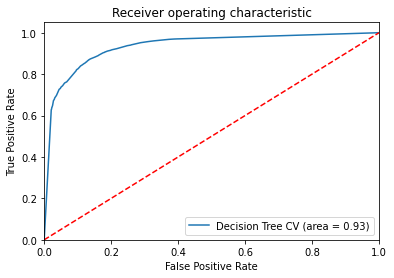

In [137]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_cv_roc_auc = roc_auc_score(y_test, prob_tree_cv[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_tree_cv[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree CV (area = %0.2f)' % tree_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [138]:
acc_tree_cv = accuracy_score(y_test, pred_tree_cv)
prec_tree_cv = precision_score(y_test, pred_tree_cv)
rec_tree_cv = recall_score(y_test, pred_tree_cv)
f1_tree_cv = f1_score(y_test, pred_tree_cv)

tree_cv_results = pd.DataFrame([['Decision Tree CV', acc_tree_cv, prec_tree_cv, rec_tree_cv, f1_tree_cv, tree_cv_roc_auc,
                             probability_actual_tree_cv, probability_pred_tree_cv,
                                fnr_tree_cv, fpr_tree_cv]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

tree_cv_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Decision Tree CV,0.867799,0.863538,0.873528,0.868504,0.934698,0.499791,0.505573,0.13,0.14


## Neural Network

### Neural Network without GridSearchCV

In [139]:
#train artificial neural network
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(X_train, y_train)

MLPClassifier()

In [140]:
train_score_ann = ann.score(X_train, y_train)
test_score_ann = ann.score(X_test, y_test)
print('Train Accuracy Score', train_score_ann)
print('Test Accuracy Score', test_score_ann)

Train Accuracy Score 0.8352582359668992
Test Accuracy Score 0.8350164826539689


In [141]:
prob_ann = ann.predict_proba(X_test)
df_prob_ann = pd.DataFrame(prob_ann)
df_prob_ann.head()

,0,1
0,0.769787,0.230213
1,0.267049,0.732951
2,0.516853,0.483147
3,0.000011,0.999989
4,0.228914,0.771086


In [142]:
pred_ann = ann.predict(X_test)
df_pred_ann = pd.DataFrame(pred_ann)
df_pred_ann.head()

,0
0,0
1,1
2,0
3,1
4,1


In [143]:
df_pred_ann[0].value_counts()

0    19127
1    19095
Name: 0, dtype: int64

In [144]:
# Concatenate dataframes side by side
pred_final_ann = pd.concat([df_pred_ann, df_prob_ann], axis=1)
pred_final_ann.head()

,0,0,1
0,0,0.769787,0.230213
1,1,0.267049,0.732951
2,0,0.516853,0.483147
3,1,0.000011,0.999989
4,1,0.228914,0.771086


In [145]:
predicted_df_ann = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_ann})
predicted_df_ann.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,0
118183,1,1
117927,1,1


In [146]:
probability_actual_ann = (predicted_df_ann['Actual value'][predicted_df_ann['Actual value']==1].count()/predicted_df_ann['Actual value'].count())
probability_pred_ann = (predicted_df_ann['Predicted value'][predicted_df_ann['Predicted value']==1].count()/predicted_df_ann['Actual value'].count())
pr_ann = {'Actual Probability':  [probability_actual_ann],
        'Predicted Probability': [probability_pred_ann]}
pr_df_ann = pd.DataFrame(pr_ann)  
pr_df_ann

,Actual Probability,Predicted Probability
0,0.499791,0.499581


<AxesSubplot:>

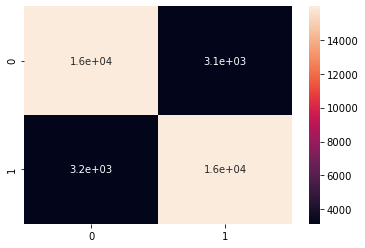

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_ann = confusion_matrix(y_test, pred_ann)
sns.heatmap(cf_matrix_ann,annot=True)

In [148]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_ann).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_ann = round(fn / (tp + fn),2)
print("False negative rate:", fnr_ann)
fpr_ann = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_ann)

False negative rate: 0.17
False positive rate: 0.16


In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_ann))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     19119
           1       0.84      0.83      0.83     19103

    accuracy                           0.84     38222
   macro avg       0.84      0.84      0.84     38222
weighted avg       0.84      0.84      0.84     38222



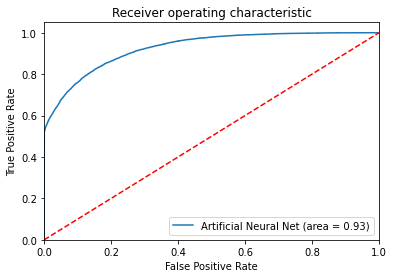

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ann_roc_auc = roc_auc_score(y_test, prob_ann[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_ann[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Net (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [151]:
acc_ann = accuracy_score(y_test, pred_ann)
prec_ann = precision_score(y_test, pred_ann)
rec_ann = recall_score(y_test, pred_ann)
f1_ann = f1_score(y_test, pred_ann)

ann_results = pd.DataFrame([['Artficial Neural Net', acc_ann, prec_ann, rec_ann, f1_ann, ann_roc_auc,
                             probability_actual_ann, probability_pred_ann,
                                fnr_ann, fpr_ann]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

ann_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Artficial Neural Net,0.835016,0.835088,0.834738,0.834913,0.926317,0.499791,0.499581,0.17,0.16


### Neural Network with GridSearchCV

In [152]:
#train artificial neural network
from sklearn.neural_network import MLPClassifier
parameters = {'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': np.logspace(-5, 0, 10),
              'learning_rate': ['adaptive'],
              'max_iter': [1000]}
ann = MLPClassifier()
grid_search = GridSearchCV(ann, parameters, cv=5, verbose=0)
ann_cv = grid_search.fit(X_train, y_train)

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yekaa\anaconda3.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

In [153]:
#test artificial neural network
print("Tuned hpyerparameters (best parameters):", ann_cv.best_params_)
print("Train accuracy:", ann_cv.best_score_)
print("Test accuracy:", ann_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'alpha': 1e-05, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs'}
Train accuracy: 0.8372765182422477
Test accuracy: 0.8414264036418816


In [154]:
prob_ann_cv = ann_cv.predict_proba(X_test)
df_prob_ann_cv = pd.DataFrame(prob_ann_cv)
df_prob_ann_cv.head()

,0,1
0,8.592670e-01,0.140733
1,2.306070e-01,0.769393
2,6.385882e-01,0.361412
3,1.575406e-12,1.000000
4,3.319065e-01,0.668094


In [155]:
pred_ann_cv = ann_cv.predict(X_test)
df_pred_ann_cv = pd.DataFrame(pred_ann_cv)
df_pred_ann_cv.head()

,0
0,0
1,1
2,0
3,1
4,1


In [156]:
df_pred_ann_cv[0].value_counts()

0    19466
1    18756
Name: 0, dtype: int64

In [157]:
# Concatenate dataframes side by side
pred_final_ann_cv = pd.concat([df_pred_ann_cv, df_prob_ann_cv], axis=1)
pred_final_ann_cv.head()

,0,0,1
0,0,8.592670e-01,0.140733
1,1,2.306070e-01,0.769393
2,0,6.385882e-01,0.361412
3,1,1.575406e-12,1.000000
4,1,3.319065e-01,0.668094


In [158]:
predicted_df_ann_cv = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_ann_cv})
predicted_df_ann_cv.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,0
118183,1,1
117927,1,1


In [159]:
probability_actual_ann_cv  = (predicted_df_ann_cv ['Actual value'][predicted_df_ann_cv['Actual value']==1].count()/predicted_df_ann_cv['Actual value'].count())
probability_pred_ann_cv  = (predicted_df_ann_cv ['Predicted value'][predicted_df_ann_cv['Predicted value']==1].count()/predicted_df_ann_cv['Actual value'].count())
pr_ann_cv  = {'Actual Probability':  [probability_actual_ann_cv ],
        'Predicted Probability': [probability_pred_ann_cv ]}
pr_df_ann_cv  = pd.DataFrame(pr_ann_cv )  
pr_df_ann_cv 

,Actual Probability,Predicted Probability
0,0.499791,0.490712


<AxesSubplot:>

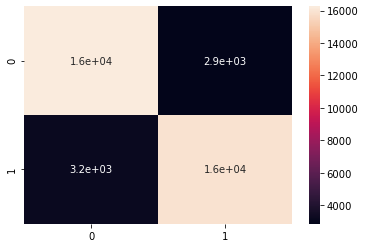

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_ann_cv = confusion_matrix(y_test, pred_ann_cv)
sns.heatmap(cf_matrix_ann_cv,annot=True)

In [161]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_ann_cv).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_ann_cv = round(fn / (tp + fn),2)
print("False negative rate:", fnr_ann_cv )
fpr_ann_cv  = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_ann_cv )

False negative rate: 0.17
False positive rate: 0.15


In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_ann_cv))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     19119
           1       0.85      0.83      0.84     19103

    accuracy                           0.84     38222
   macro avg       0.84      0.84      0.84     38222
weighted avg       0.84      0.84      0.84     38222



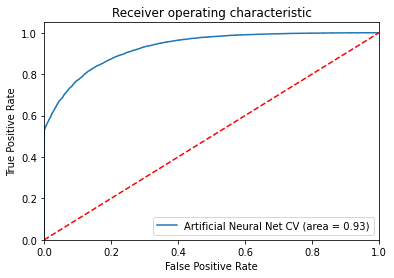

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ann_cv_roc_auc = roc_auc_score(y_test, prob_ann_cv[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_ann_cv[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Net CV (area = %0.2f)' % ann_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [164]:
acc_ann_cv = accuracy_score(y_test, pred_ann_cv)
prec_ann_cv = precision_score(y_test, pred_ann_cv)
rec_ann_cv = recall_score(y_test, pred_ann_cv)
f1_ann_cv = f1_score(y_test, pred_ann_cv)

ann_cv_results = pd.DataFrame([['Artficial Neural Net CV', acc_ann_cv, prec_ann_cv, rec_ann_cv, f1_ann_cv,
                                ann_cv_roc_auc, probability_actual_ann_cv, probability_pred_ann_cv,
                                fnr_ann_cv, fpr_ann_cv]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

ann_cv_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Artficial Neural Net CV,0.841426,0.847675,0.832278,0.839906,0.929891,0.499791,0.490712,0.17,0.15


## SVM

### SVM without GridSearchCV

In [165]:
#train support vector machine
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [166]:
train_score_svm = svm.score(X_train, y_train)
test_score_svm = svm.score(X_test, y_test)
print('Train Accuracy Score', train_score_svm)
print('Test Accuracy Score', test_score_svm)

Train Accuracy Score 0.8260747684510327
Test Accuracy Score 0.8271937627544346


In [167]:
prob_svm = svm.predict_proba(X_test)
df_prob_svm = pd.DataFrame(prob_svm)
df_prob_svm.head()

,0,1
0,0.802660,0.197340
1,0.177246,0.822754
2,0.730093,0.269907
3,0.088523,0.911477
4,0.176148,0.823852


In [168]:
pred_svm = svm.predict(X_test)
df_pred_svm = pd.DataFrame(pred_svm)
df_pred_svm.head()

,0
0,0
1,1
2,0
3,1
4,1


In [169]:
df_pred_svm[0].value_counts()

0    20454
1    17768
Name: 0, dtype: int64

In [170]:
# Concatenate dataframes side by side
pred_final_svm = pd.concat([df_pred_svm, df_prob_svm], axis=1)
pred_final_svm.head()

,0,0,1
0,0,0.802660,0.197340
1,1,0.177246,0.822754
2,0,0.730093,0.269907
3,1,0.088523,0.911477
4,1,0.176148,0.823852


In [171]:
predicted_df_svm = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_svm})
predicted_df_svm.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,0
118183,1,1
117927,1,1


In [172]:
probability_actual_svm = (predicted_df_svm['Actual value'][predicted_df_svm['Actual value']==1].count()/predicted_df_svm['Actual value'].count())
probability_pred_svm = (predicted_df_svm['Predicted value'][predicted_df_svm['Predicted value']==1].count()/predicted_df_svm['Actual value'].count())
pr_svm = {'Actual Probability':  [probability_actual_svm],
        'Predicted Probability': [probability_pred_svm]}
pr_df_svm = pd.DataFrame(pr_svm)  
pr_df_svm

,Actual Probability,Predicted Probability
0,0.499791,0.464863


<AxesSubplot:>

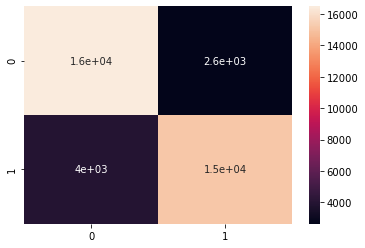

In [173]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cf_matrix_svm,annot=True)

In [174]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_svm).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_svm = round(fn / (tp + fn),2)
print("False negative rate:", fnr_svm)
fpr_svm = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_svm)

False negative rate: 0.21
False positive rate: 0.14


In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     19119
           1       0.85      0.79      0.82     19103

    accuracy                           0.83     38222
   macro avg       0.83      0.83      0.83     38222
weighted avg       0.83      0.83      0.83     38222



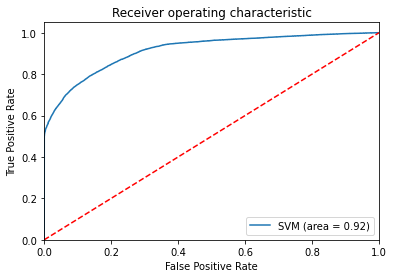

In [176]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test, prob_svm[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_svm[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [177]:
acc_svm = accuracy_score(y_test, pred_svm)
prec_svm = precision_score(y_test, pred_svm)
rec_svm = recall_score(y_test, pred_svm)
f1_svm = f1_score(y_test, pred_svm)

svm_results = pd.DataFrame([['Support Vector Machine', acc_svm, prec_svm, rec_svm, f1_svm, svm_roc_auc, 
                             probability_actual_svm, probability_pred_svm,
                                fnr_svm, fpr_svm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

svm_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Support Vector Machine,0.827194,0.8517,0.792179,0.820862,0.91522,0.499791,0.464863,0.21,0.14


### SVM with GridSearchCV

## XGBOOST

### XGBOOST without GridSearchCV

In [178]:
!pip install xgboost

In [179]:
!pip install xgboost
import xgboost as xgb
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [180]:
train_score_xgboost = xgboost.score(X_train, y_train)
test_score_xgboost = xgboost.score(X_test, y_test)
print('Train Accuracy Score', train_score_xgboost)
print('Test Accuracy Score', test_score_xgboost)

Train Accuracy Score 0.956807427507793
Test Accuracy Score 0.9547642718853017


In [181]:
prob_xgboost = xgboost.predict_proba(X_test)
df_prob_xgboost = pd.DataFrame(prob_xgboost)
df_prob_xgboost.head()

,0,1
0,0.902825,0.097175
1,0.019358,0.980642
2,0.049447,0.950553
3,0.001037,0.998963
4,0.018577,0.981423


In [182]:
pred_xgboost = xgboost.predict(X_test)
df_pred_xgboost = pd.DataFrame(pred_xgboost)
df_pred_xgboost.head()

,0
0,0
1,1
2,1
3,1
4,1


In [183]:
df_pred_xgboost[0].value_counts()

0    20378
1    17844
Name: 0, dtype: int64

In [184]:
# Concatenate dataframes side by side
pred_final_xgboost = pd.concat([df_pred_xgboost, df_prob_xgboost], axis=1)
pred_final_xgboost.head()

,0,0,1
0,0,0.902825,0.097175
1,1,0.019358,0.980642
2,1,0.049447,0.950553
3,1,0.001037,0.998963
4,1,0.018577,0.981423


In [185]:
predicted_df_xgboost = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_xgboost})
predicted_df_xgboost.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [186]:
probability_actual_xgboost = (predicted_df_xgboost['Actual value'][predicted_df_xgboost['Actual value']==1].count()/predicted_df_xgboost['Actual value'].count())
probability_pred_xgboost = (predicted_df_xgboost['Predicted value'][predicted_df_xgboost['Predicted value']==1].count()/predicted_df_xgboost['Actual value'].count())
pr_xgboost = {'Actual Probability':  [probability_actual_xgboost],
        'Predicted Probability': [probability_pred_xgboost]}
pr_df_xgboost = pd.DataFrame(pr_xgboost)  
pr_df_xgboost

,Actual Probability,Predicted Probability
0,0.499791,0.466852


<AxesSubplot:>

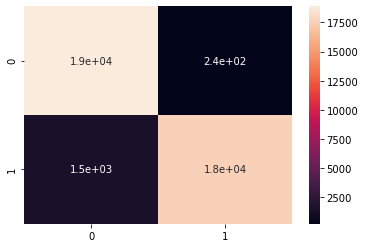

In [187]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_xgboost = confusion_matrix(y_test, pred_xgboost)
sns.heatmap(cf_matrix_xgboost,annot=True)

In [188]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_xgboost).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_xgboost = round(fn / (tp + fn),2)
print("False negative rate:", fnr_xgboost)
fpr_xgboost = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_xgboost)

False negative rate: 0.08
False positive rate: 0.01


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_xgboost))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19119
           1       0.99      0.92      0.95     19103

    accuracy                           0.95     38222
   macro avg       0.96      0.95      0.95     38222
weighted avg       0.96      0.95      0.95     38222



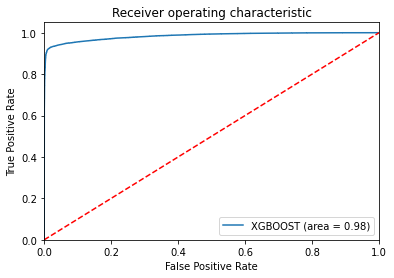

In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgboost_roc_auc = roc_auc_score(y_test, prob_xgboost[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_xgboost[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (area = %0.2f)' % xgboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [191]:
acc_xgboost = accuracy_score(y_test, pred_xgboost)
prec_xgboost = precision_score(y_test, pred_xgboost)
rec_xgboost = recall_score(y_test, pred_xgboost)
f1_xgboost = f1_score(y_test, pred_xgboost)

xgboost_results = pd.DataFrame([['XGBOOST', acc_xgboost, prec_xgboost, 
                                 rec_xgboost, f1_xgboost, xgboost_roc_auc,
                                probability_actual_xgboost,probability_pred_xgboost,
                                fnr_xgboost, fpr_xgboost]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

xgboost_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,XGBOOST,0.954764,0.98683,0.921792,0.953203,0.984233,0.499791,0.466852,0.08,0.01


### XGBOOST with GridSearchCV

In [193]:

import xgboost as xgb
parameters = {
    'max_depth': [2*n for n in range(1,10)],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200],
    'gamma': [0, 0.1, 0.5]
}
xgboost = xgb.XGBClassifier()
grid_search = GridSearchCV(xgboost, parameters, cv=5, verbose=0)
xgboost_cv = grid_search.fit(X_train, y_train)

In [194]:
#test artificial neural network
print("Tuned hpyerparameters (best parameters):", xgboost_cv.best_params_)
print("Train accuracy:", xgboost_cv.best_score_)
print("Test accuracy:", xgboost_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 14, 'n_estimators': 200}
Train accuracy: 0.9580072287002848
Test accuracy: 0.9614358223012924


In [195]:
prob_xgboost_cv = xgboost_cv.predict_proba(X_test)
df_prob_xgboost_cv = pd.DataFrame(prob_xgboost_cv)
df_prob_xgboost_cv.head()

,0,1
0,0.965326,0.034674
1,0.009955,0.990045
2,0.013437,0.986563
3,0.000619,0.999381
4,0.004091,0.995909


In [196]:
pred_xgboost_cv = xgboost_cv.predict(X_test)
df_pred_xgboost_cv = pd.DataFrame(pred_xgboost_cv)
df_pred_xgboost_cv.head()

,0
0,0
1,1
2,1
3,1
4,1


In [197]:
df_pred_xgboost_cv[0].value_counts()

0    19941
1    18281
Name: 0, dtype: int64

In [198]:
# Concatenate dataframes side by side
pred_final_xgboost_cv = pd.concat([df_pred_xgboost_cv, df_prob_xgboost_cv], axis=1)
pred_final_xgboost_cv.head()

,0,0,1
0,0,0.965326,0.034674
1,1,0.009955,0.990045
2,1,0.013437,0.986563
3,1,0.000619,0.999381
4,1,0.004091,0.995909


In [199]:
predicted_df_xgboost_cv = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred_xgboost_cv})
predicted_df_xgboost_cv.head()

,Actual value,Predicted value
25500,0,0
68601,1,1
125511,1,1
118183,1,1
117927,1,1


In [200]:
probability_actual_xgboost_cv  = (predicted_df_xgboost_cv ['Actual value'][predicted_df_xgboost_cv['Actual value']==1].count()/predicted_df_xgboost_cv['Actual value'].count())
probability_pred_xgboost_cv  = (predicted_df_xgboost_cv ['Predicted value'][predicted_df_xgboost_cv['Predicted value']==1].count()/predicted_df_xgboost_cv['Actual value'].count())
pr_xgboost_cv  = {'Actual Probability':  [probability_actual_xgboost_cv ],
        'Predicted Probability': [probability_pred_xgboost_cv ]}
pr_df_xgboost_cv  = pd.DataFrame(pr_xgboost_cv )  
pr_df_xgboost_cv 

,Actual Probability,Predicted Probability
0,0.499791,0.478285


<AxesSubplot:>

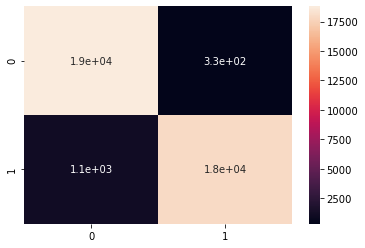

In [201]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_xgboost_cv = confusion_matrix(y_test, pred_xgboost_cv)
sns.heatmap(cf_matrix_xgboost_cv,annot=True)

In [202]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_xgboost_cv).ravel()
# Calculate false positive rate
# Calculate false negative rate
fnr_xgboost_cv = round(fn / (tp + fn),2)
print("False negative rate:", fnr_xgboost_cv)
fpr_xgboost_cv = round(fp / (fp + tn), 2)
print("False positive rate:", fpr_xgboost_cv)

False negative rate: 0.06
False positive rate: 0.02


In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_xgboost_cv))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     19119
           1       0.98      0.94      0.96     19103

    accuracy                           0.96     38222
   macro avg       0.96      0.96      0.96     38222
weighted avg       0.96      0.96      0.96     38222



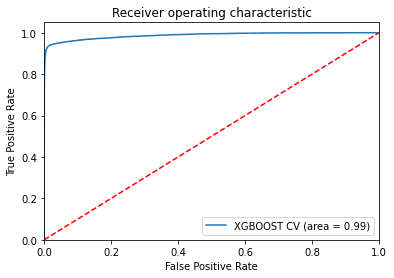

In [204]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgboost_cv_roc_auc = roc_auc_score(y_test, prob_xgboost_cv[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_xgboost_cv[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST CV (area = %0.2f)' % xgboost_cv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [205]:
acc_xgboost_cv = accuracy_score(y_test, pred_xgboost_cv)
prec_xgboost_cv = precision_score(y_test, pred_xgboost_cv)
rec_xgboost_cv = recall_score(y_test, pred_xgboost_cv)
f1_xgboost_cv = f1_score(y_test, pred_xgboost_cv)

xgboost_cv_results = pd.DataFrame([['XGBOOST CV', acc_xgboost_cv, prec_xgboost_cv, 
                                    rec_xgboost_cv, f1_xgboost_cv, xgboost_cv_roc_auc, 
                                    probability_actual_xgboost_cv,probability_pred_xgboost_cv,
                                    fnr_xgboost_cv, fpr_xgboost_cv]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score',
                          'Actual Default Rate', 'Pred Default Rate','FNR', 'FPR'])

xgboost_cv_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,XGBOOST CV,0.961436,0.982167,0.939905,0.960571,0.98715,0.499791,0.478285,0.06,0.02


## All Models Final Result

In [206]:
# Concatenate the dataframes
final_all_model_res = pd.concat([lr_results, logreg_cv_results, rf_results, forest_cv_results, knn_results, knn_cv_results, tree_results, tree_cv_results, ann_results, ann_cv_results,svm_results, xgboost_results, xgboost_cv_results], axis=0)


In [207]:
final_all_model_res

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score,Actual Default Rate,Pred Default Rate,FNR,FPR
0,Logistic Regression,0.801659,0.843039,0.741140,0.788812,0.898727,0.499791,0.439380,0.26,0.14
0,Logistic Regression CV,0.801894,0.843164,0.741559,0.789104,0.898723,0.499791,0.439564,0.26,0.14
0,Random Forest,0.935168,0.946837,0.922054,0.934281,0.982439,0.499791,0.486709,0.08,0.05
0,Random Forest CV,0.919183,0.923920,0.913521,0.918691,0.975842,0.499791,0.494166,0.09,0.08
0,K-Nearest Neighbors,0.855476,0.842991,0.873528,0.857988,0.930873,0.499791,0.517895,0.13,0.16
0,K-Nearest Neighbors CV,0.868453,0.854124,0.888552,0.870998,0.868461,0.499791,0.519936,0.11,0.15
0,Decision Tree,0.919470,0.913976,0.926033,0.919965,0.919662,0.499791,0.506384,0.07,0.09
0,Decision Tree CV,0.867799,0.863538,0.873528,0.868504,0.934698,0.499791,0.505573,0.13,0.14
0,Artficial Neural Net,0.835016,0.835088,0.834738,0.834913,0.926317,0.499791,0.499581,0.17,0.16
0,Artficial Neural Net CV,0.841426,0.847675,0.832278,0.839906,0.929891,0.499791,0.490712,0.17,0.15


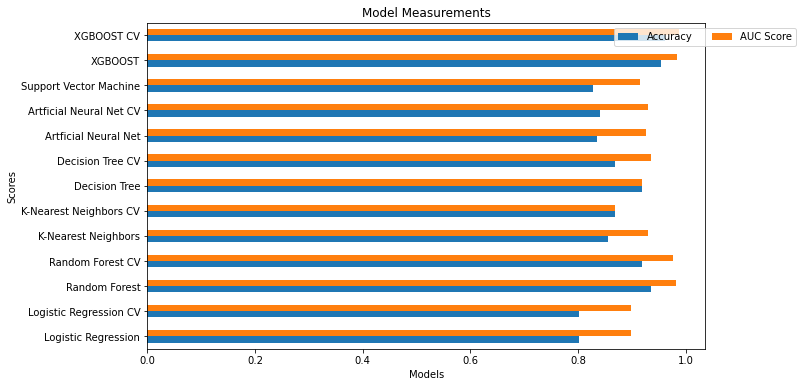

In [208]:
# Set the 'category' column as the index
#final_all_model_res.set_index('Model', inplace=True)

# Plot the data
ax = final_all_model_res.plot(x='Model', y=['Accuracy', 'AUC Score'],kind='barh')

# Add labels and a title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Measurements')
# Change the figure size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(1, 1), ncol=2)
    
# Show the plot
plt.show()